<a href="https://colab.research.google.com/github/JADukeAIPI/AIPIProject/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [113]:
NAME = "Chad Miller"
COLLABORATORS = ""

---

<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Assignment 5

In [114]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'forestfires.csv':'https://storage.googleapis.com/aipi_datasets/forestfires.csv',
        'Heart.csv':'https://storage.googleapis.com/aipi_datasets/Heart.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import is_numeric_dtype
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin

import warnings
warnings.filterwarnings("ignore")

### Question 1 [30 points]
For this exercise you are going to implement a decision tree from scratch in pure Python.  You may NOT use any pandas or scikit-learn in your code (only in the code I have provided to read in and process the data).

In [116]:
# Read in the data from csv
heart_df = pd.read_csv('Heart.csv',index_col=0)
# Clean up the dataframe
heart_df = heart_df.dropna()
heart_df['Sex'] = heart_df['Sex'].astype(str)
heart_df['Slope'] = heart_df['Slope'].astype(str)
heart_df['ExAng'] = heart_df['ExAng'].astype(str)
heart_df['AHD'] = (heart_df['AHD']=='Yes').astype(int)
heart_df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [117]:
X = np.array(heart_df.drop(labels='AHD',axis=1))
y = np.array(heart_df['AHD'])

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.1)

# Convert the X and y arrays into lists (or lists of lists)
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [118]:
print(X_train[0])

[63, '1', 'asymptomatic', 130, 254, 0, 2, 147, '0', 1.4, '2', 1.0, 'reversable']


### Q1.1 [5 points]
First let's write a function to calculate the entropy of a list of samples based on how mixed their class values are.

In [119]:
def entropy(y):
    '''
    Computes the entropy for a list of classes (y)

    Inputs:
        y(list): list of targets
        
    Returns:
        entropy(float): calculated entropy
    '''

    # YOUR CODE HERE
    classes=set(y)
    a = [y.count(x)/len(y) for x in classes]
    entropy = -np.sum(a * np.log2(a))
    #print(f'The entropy is {round(entropy,3)}')
    return(entropy)


    raise NotImplementedError()

In [120]:
# Test cell for entropy()
impure_ys = [0,0,0,1,1,1,1,1,1]
entropy_val = entropy(impure_ys)
assert np.round(entropy_val,2) == 0.92

pure_ys1 = [0,0,0,0]
entropy_val = entropy(pure_ys1)
assert entropy_val == 0

pure_ys2 = [1,1,1,1,1,1,1,1]
entropy_val = entropy(pure_ys2)
assert entropy_val == 0


### Q1.2 [5 points]
Now let's write a function to calculate the information gain of a possible split.  Information gain of a split is the entropy of the parent node minus the weighted average of the entropy of the left and right children nodes, weighted by the number of samples on the left and on the right.

In [121]:
def information_gain(parent_y, children_ys):
    '''
    Computes the information gain of a possible split using the target values of the parent and the resulting children

    Inputs:
        parent_y(list): list of the parent node targets
        children_ys(list): list containing two lists - one for each the left child and right child. Each list contains the resulting target values of the child

    Returns:
        info_gain(float): information gain of the split based on entropy of parent minus weighted average entropy of children
    '''
    # Inputs:
    #   previous_y: the distribution of original labels (0's and 1's)
    #   current_y:  the distribution of labels after splitting based on a particular
    #               split attribute and split value
    
    # YOUR CODE HERE
    informationGain=0
    split1 = children_ys[0]
    split2 = children_ys[1]
    fraction1 = len(split1)/len(parent_y)
    fraction2 = len(split2)/len(parent_y)

    #print(fraction1, fraction2)

    informationGain = entropy(parent_y)-(fraction1 * entropy(split1) + fraction2 * entropy(split2))
    #print(f'IG value is {informationGain}')

    return informationGain


    raise NotImplementedError()

In [122]:
# Test cell for information_gain()
parent_ys = [0,0,0,1,1,1]
children_ys = [[0,0], [1,1,1,0]]
info_gain = information_gain(parent_ys,children_ys)

assert np.round(info_gain,3) == 0.459

### Q1.3 [20 points]
Now let's complete two more functions we need in order to train a decision tree.  The `partition_classes()` function executes the split of the data based on an input split_attribute and split_va.  The `best_split()` function finds the optimal split_attribute and split_val at a node in the tree.

In [123]:
def partition_classes(X, y, split_attribute, split_val):
    '''
    Splits the X and y data at a node using the input split_attribute and split_val.  
    
    Numeric split attribute:
      Split the data X into two lists(X_left and X_right) where the first list has all
      the rows where the split attribute is less than or equal to the split value, and the 
      second list has all the rows where the split attribute is greater than the split 
      value. Also create two lists(y_left and y_right) with the corresponding y labels.

    Categorical Split Attribute:
      Split the data X into two lists(X_left and X_right) where the first list has all 
      the rows where the split attribute is equal to the split value, and the second list
      has all the rows where the split attribute is not equal to the split value.
      Also create two lists(y_left and y_right) with the corresponding y labels.

    Inputs:
        X(list): list containing the observations (each a list)
        y(list): list of the corresponding target labels
        split_attribute(int): column index of the feature to split on
        split_val(float, int or str): numerical or categorical value to divide the data on

    Returns:
        X_left(list): list of observations (each a list) included in the left child of the split per the above splitting rules
        X_right(list): list of observations (each a list) included in the right child of the split per the above splitting rules
        y_left(list): list of corresponding target values of observations included in the left child
        y_right(list): list of corresponding target values of observations included in the right child
    '''
    
    # YOUR CODE HERE
    X_left = []
    X_right = []
    y_left = []
    y_right = []

    for idx in range(len(X)):
      #print(idx, X[idx], X[idx][split_attribute])
      if isinstance(X[idx][split_attribute], str):
        if X[idx][split_attribute]==split_val:
          X_right.append(X[idx])
          y_right.append(y[idx])
        else:
          X_left.append(X[idx])
          y_left.append(y[idx])
      else:
        if X[idx][split_attribute] <= split_val:
          X_left.append(X[idx])
          y_left.append(y[idx])
        else: 
          X_right.append(X[idx])
          y_right.append(y[idx])
    
    #print(len(X_left), len(X_right), len(y_left), len(y_right))

    return X_left, X_right, y_left, y_right


    raise NotImplementedError()

In [124]:
Xsplit_left, Xsplit_right, ysplit_left, ysplit_right = partition_classes(X_train, y_train, 2, 'asymptomatic')
print(ysplit_left, ysplit_right)

result = information_gain(y_train, [ysplit_left, ysplit_right])
print(result)

[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]
0.2305848994101336


In [125]:
def best_split(X, y):
    '''
    Finds the best feature (split_attribute) and value to split on (split_value) for a node in the tree.

    The function should evaluate evaluate ALL features to determine the optimal splitting feature.  For each feature, evaluate ALL possible values
    (numeric or categorical) of the feature as the split_value.  If the type of the feature values is numeric (float or int), it should be considered 
    as a numeric split attribute (per the instructions above in the partition_classes() function).  If the type is not numeric (string, object etc), 
    it should be considered as a categorical split attribute.

    Inputs:
        X(list): list containing the observations (each a list)
        y(list): list of the corresponding target labels

    Returns:
        node_dict(dict): dictionary containing the following 4 keys/values for the node:
            'split_attribute': (int) column index of the feature to split on
            'split_value': (float, int or str) numerical or categorical value to divide the data on
            'left': (list) list containing two lists: X_left (data going to left side of split), y_left (corresponding targets going to left side)
            'right': (list) list containing two lists: X_right (data going to right side of split), y_right (corresponding targets going to right side)
    '''

    # YOUR CODE HERE
    #get feature set which is a list of lists
    features = []
    #print(len(X[0]))
    for idx in range(len(X[0])):
      #print(idx, X[0][idx])
      features.append(list(set([x[idx] for x in X])))
      
    best_IG= 0
    node_dict = {'split_attribute':0, 'split_value':'', 'left': [], 'right': []}
    for idx in range(len(X[0])):
      for feature_val in features[idx]:
        X_left, X_right, y_left, y_right = partition_classes(X, y, idx, feature_val)
        #print(f'for feature_val {feature_val} the split is {len(X_left), len(X_right)}')
        result = information_gain(y, [y_left, y_right])
        if result > best_IG:
          node_dict['split_attribute']=idx
          node_dict['split_value']=feature_val
          node_dict['left']=[X_left, y_left]
          node_dict['right']=[X_right, y_right]
          best_IG = result

    print(f'highest IG value is {best_IG}')
    return node_dict

    raise NotImplementedError()

In [126]:
node1 = best_split(X_train, y_train)
print(node1['split_attribute'])
print(node1['split_value'])
print(node1['left'])

highest IG value is 0.2305848994101336
2
asymptomatic
[[[47, '1', 'nonanginal', 108, 243, 0, 0, 152, '0', 0.0, '1', 0.0, 'normal'], [39, '0', 'nonanginal', 94, 199, 0, 0, 179, '0', 0.0, '1', 0.0, 'normal'], [56, '1', 'nontypical', 120, 236, 0, 0, 178, '0', 0.8, '1', 0.0, 'normal'], [55, '1', 'nontypical', 130, 262, 0, 0, 155, '0', 0.0, '1', 0.0, 'normal'], [70, '1', 'nontypical', 156, 245, 0, 2, 143, '0', 0.0, '1', 0.0, 'normal'], [59, '1', 'typical', 134, 204, 0, 0, 162, '0', 0.8, '1', 2.0, 'normal'], [68, '0', 'nonanginal', 120, 211, 0, 2, 115, '0', 1.5, '2', 0.0, 'normal'], [58, '1', 'nonanginal', 112, 230, 0, 2, 165, '0', 2.5, '2', 1.0, 'reversable'], [49, '1', 'nonanginal', 120, 188, 0, 0, 139, '0', 2.0, '2', 3.0, 'reversable'], [42, '1', 'nontypical', 120, 295, 0, 0, 162, '0', 0.0, '1', 0.0, 'normal'], [54, '0', 'nonanginal', 110, 214, 0, 0, 158, '0', 1.6, '2', 0.0, 'normal'], [58, '0', 'nonanginal', 120, 340, 0, 0, 172, '0', 0.0, '1', 0.0, 'normal'], [60, '1', 'nonanginal', 140,

Now we have everything we need to implement the tree in a class.  Complete the `fit()` and `predict()` methods of the `MyDecisionTree` class below.  The `fit()` method should train the tree (using the above functions you've written).  The `predict()` method should use the trained tree to generate predictions for new data.

In [127]:
class MyDecisionTree(object):
    def __init__(self, max_depth=10,min_leafsize=1):
        # Initializing the tree as an empty dictionary or list, as preferred
        self.tree = {}
        self.max_depth = max_depth
        self.min_leafsize = min_leafsize
        pass
    	
    def fit(self, X, y, depth=0):
        '''
        Trains the tree using the input X and y

        To train the tree you might follow a process such as:
            - Create the first node using best_split()
            - Check if the data can be split further (check depth and min_leafsize)
            - Process left side of node recursively using self.fit()
            - Process right size of node recursively using self.fit()
            - Terminate the tree when max_depth is reached or leaf sizes reach min_leafsize

        Inputs:
            X(list): list containing the observations (each a list of feature values)
            y(list): list of the corresponding target labels
            par_node(dict): dictionary corresponding to node (output of best_split() function).  Used to recursively call fit() for each tree node

        Returns:
            par_node(dict): dictionary containing the tree, with the following keys/values:
                'split_attribute': (int) column index of the splitting feature for the node
                'split_value': (float, int or str) numerical or categorical splitting value of the node
                'left': (dict) dictionary containing the keys/values of par_node for the left side children nodes
                'right': (dict) dictionary containing the keys/values of par_node for the right side children nodes

        '''

        # YOUR CODE HERE
        current_node = best_split(X,y)
        if depth==0:
          self.tree=current_node

        if ((len(X)>self.min_leafsize) and (depth<self.max_depth)):
          current_node['left'] = self.fit(current_node['left'][0], current_node['left'][1] , depth+1)
          current_node['right'] = self.fit(current_node['right'][0], current_node['right'][1], depth+1)
          depth=depth+1
       
        else:
         current_node['left'] = None
         current_node['right'] = None
        #self.tree = current_node
        return current_node
        
       # self.tree=current_node

        raise NotImplementedError()


    def predict(self, X):
        '''
        Uses the tree to generate predictions for new data 

        Inputs:
            X(list): list of observations, with each observation being a list of feature values

        Returns:
            preds(list): list of predictions (0 or 1)
        '''
        
        # YOUR CODE HERE
        tree = self.tree
        preds = []

        print(tree)

        def make_comparison(x, current_node):
          current_split_attribute = current_node['split_attribute']
          current_split_value = current_node['split_value']
          
          if x[current_split_attribute] <= current_split_value:
            if current_node['left']:
              return make_comparison(x, current_node['left'])          
            else:
              return ())

          if x[current_split_attribute] > current_split_value:
            if current_node['right'] == None:
              return 
            else: 
              return make_comparison(x, current_node['right'])


        for x in X:
          current_pred = make_comparison(x, tree)
          preds.append(current_pred)
          
        return preds

        raise NotImplementedError()

SyntaxError: ignored

In [ ]:
tree = MyDecisionTree(max_depth=3,min_leafsize=1)
treedict = tree.fit(X_train,y_train)
print(treedict)
assert type(treedict) == dict

test_preds = tree.predict(X_test)
assert len(test_preds) == len(y_test)

errors = []
accuracy = sum(1 for pred,act in zip(test_preds,y_test) if pred==act) / len(test_preds)
print('Accuracy: {:.3f}'.format(accuracy))
assert accuracy >= 0.7


## Question 2 [25 points]
In this questions we will work with a dataset on forest fires.  We have some data which has been compiled about different fire situations (e.g. weather, location) and we are trying to build a model to predict the area of forest which burned.  Full details about the dataset can be found at https://archive.ics.uci.edu/ml/datasets/Forest+Fires.  The dataset provided has been modified from the original to remove 100 rows with 0 acres burned.

Description of columns:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

In [128]:
# Read in the data from csv
fire_data = pd.read_csv('forestfires.csv')
feats = list(fire_data.columns)
feats.remove('area')
fire_data.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.0
1,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.0
2,3,4,aug,tue,88.8,147.3,614.5,9.0,14.4,66,5.4,0.0,0.0
3,2,4,aug,tue,94.8,108.3,647.1,17.0,20.1,40,4.0,0.0,0.0
4,2,4,sep,sat,92.5,121.1,674.4,8.6,24.1,29,4.5,0.0,0.0


In [129]:
print(fire_data.area.value_counts())

0.00      148
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64


### Q2.1 [5 points]
We first need to prepare our data for modeling.  Complete the below function `prepare_data()` which takes as input the `fire_data` dataframe and performs the following:  
- Remove any rows where 'area' is 0 (there is no area burned)  
- Separate the data into an X dataframe containing all original columns except 'area', and a y dataframe containing a single column 'area' (the variable we are trying to predict). 
- Split the data using `train_test_split` into training and test sets, using 20% of the data for the test set.  Be sure to set `random_state=0`.  
- Use ordinal encoding (`OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)`) to encode the categorical columns 'month' and 'day'.  Be sure to use `fit_transform` while encoding the training set and only `transform` to encode the test set.  

Your function should return `X_train,X_test,y_train,y_test` in order

In [130]:
def prepare_data(df):
    '''
    Prepares data for modeling per the above instructions

    Inputs:
        df(pd.DataFrame): dataframe containing the raw data

    Returns:
        X_train(pd.DataFrame): training data inputs
        X_test(pd.DataFrame): test set inputs
        y_train(pd.Series): training set target labels
        y_test(pd.Series): test set target labels

    '''
    # YOUR CODE HERE
    df1 = df.copy()
    df1=df1[df1.area!=0.0]
    #print(df1.shape)
    y = df1.area 
    X = df1.drop('area', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


    X_ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X_train[['month', 'day']] = X_ord_enc.fit_transform(X_train[['month', 'day']])
    X_test[['month', 'day']]= X_ord_enc.transform(X_test[['month', 'day']])


   

    return X_train, X_test, y_train, y_test


    raise NotImplementedError()

In [131]:
# Test cell for prepare_data()
X_train,X_test,y_train,y_test = prepare_data(fire_data)
display(X_train.head())

assert X_train.shape==(216,12)
assert X_test.shape==(54,12)
for col in feats:
    assert is_numeric_dtype(X_train[col])

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
44,1,2,4.0,2.0,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0
61,7,4,6.0,1.0,90.1,39.7,86.6,6.2,16.1,29,3.1,0.0
291,7,4,3.0,1.0,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0
154,7,4,1.0,4.0,91.9,109.2,565.5,8.0,21.4,38,2.7,0.0
51,6,5,5.0,0.0,92.5,56.4,433.3,7.1,23.2,39,5.4,0.0


### Q2.2 [10 points]
Complete the below function `optimize_tree_model()` which takes the training and test sets as input as well as a list of values for the `max_depth` of the tree to evaluate.  Your function should use cross-validation with 5 folds (set `shuffle=False`) and MSE as the metric to compare the performance of decision tree models using the `max_depth` values listed in the input `tree_depths` list.

After comparing the models using cross-validation, you should instantiate a model using the optimal `max_depth` that you found and then train it on the full training set.  Then, calculate the MSE on both the training and test sets.  

In [132]:
def optimize_tree_model(X_train,X_test,y_train,y_test,tree_depths):
    '''
    Finds the optimal max_depth for the tree using cross validation with 5 folds and MSE as the metric

    Inputs:
        X_train(pd.DataFrame): training data inputs
        X_test(pd.DataFrame): test set inputs
        y_train(pd.Series): training set target labels
        y_test(pd.Series): test set target labels
        tree_depths(list): list of values to evaluate for max_depth

    Returns:
        opt_depth(int or None): optimal value for max_depth
        best_tree(sklearn.tree.DecisionTreeRegressor): trained tree model using opt_depth and random_state=0 (all other hyperparams at default)
        train_mse(float): MSE on the training set
        test_mse(float): MSE on the test set
    '''
    
    # YOUR CODE HERE
    mse_list=[] #to store the mse values on cross_val_score
    
    #cross validation over the hyperparameter of max_depth
    for tree_depth in tree_depths:
      
      model = DecisionTreeRegressor(max_depth=tree_depth, random_state=0)
      mse_folds = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
      #print(mse_folds, tree_depth)
      mse=-np.mean(mse_folds)
      mse_list.append(mse)
    #print(mse_list)
    
    #get the lowest value of mse and find corresponding optimum max_depth value
    idx = np.argmin(mse)
    #print(idx)
    opt_depth = tree_depths[idx]
    
    #get predictions using the optimal value of max_depth (opt_depth)
    best_tree = DecisionTreeRegressor(max_depth=opt_depth, random_state=0)
    best_tree.fit(X_train, y_train)
    y_pred_train = best_tree.predict(X_train)
    y_pred_test = best_tree.predict(X_test)
    
    #calculate mse for the train and test datasets
    mse_train = np.square(np.subtract(y_train,y_pred_train)).mean()
    mse_test = np.square(np.subtract(y_test, y_pred_test)).mean()
  

    return opt_depth, best_tree, mse_train, mse_test

    raise NotImplementedError()

Your function found that the optimal tree depth was 1
MSE train: 8542.333, test: 1664.464


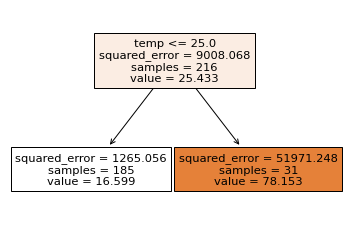

In [133]:
# Test cell for optimize_tree_model()
tree_depths = [1, 2, 3, None]
opt_depth,model,train_mse,test_mse = optimize_tree_model(X_train,X_test,y_train,y_test,tree_depths)
assert opt_depth in tree_depths
print('Your function found that the optimal tree depth was {}'.format(opt_depth))
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))


plot_tree(model,feature_names=feats,filled=True)
plt.show()

Your function found that the optimal tree depth was 2
MSE train: 3604.814, test: 1162.885


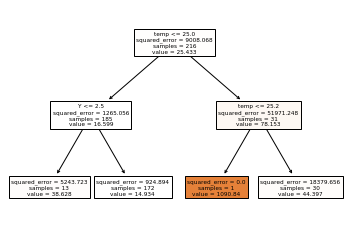

In [134]:
#as a point of comparison:
tree_depths2 = [2, 3,4,5, 6, 7]
opt_depth2, model2, train_mse2, test_mse2 = optimize_tree_model(X_train, X_test, y_train, y_test, tree_depths2)
print('Your function found that the optimal tree depth was {}'.format(opt_depth2))
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse2,test_mse2))

plot_tree(model2, feature_names=feats, filled=True)
plt.show()

### Q2.3 [10 points]
Let's now try a Random Forest model on the data rather than a single decision tree.  Complete the below function `optimize_forest_model()` which takes the training and test sets as input along with a list of values to try for the `min_samples_leaf` hyperparameter of the Random Forest.  Your function should use 5-fold cross validation (set `shuffle=False`) with MSE as the metric to compare the performance of Random Forest models using each value in the input list `min_leaf_sizes` for the hyperparameter `min_samples_leaf`.  After identifying the optimal value for `min_samples_leaf` from among the options in the input list, you should instantiate a new Random Forest model using that value for the hyperparameter.  Then, train it on the full training set and calculate the MSE on the training and test sets.  Your function should return the following in order:  
- The optimal value for `min_samples_leaf` found from among the values in the input list `min_leaf_sizes`. 
- The trained model using the optimal `min_samples_leaf` value. 
- The MSE on the training set. 
- The MSE on the test set

In [135]:
def optimize_forest_model(X_train,X_test,y_train,y_test,min_leaf_sizes):
    '''
    Finds the optimal min_samples_leaf value for the random forest using cross-validation with 5 folds and MSE as the metric

    Inputs:
        X_train(pd.DataFrame): training data inputs
        X_test(pd.DataFrame): test set inputs
        y_train(pd.Series): training set target labels
        y_test(pd.Series): test set target labels
        min_leaf_sizes(list): list of values to evaluate for min_samples_leaf

    Returns:
        opt_leaf(int): optimal value for min_samples_leaf
        best_rf(sklearn.tree.RandomForestRegressor): trained random forest model using opt_leaf and random_state=0 (all other hyperparams at default)
        train_mse(float): MSE on the training set
        test_mse(float): MSE on the test set
    '''

    # YOUR CODE HERE
    mse_list = []
    for leaf_size in min_leaf_sizes:
      model = RandomForestRegressor(min_samples_leaf=leaf_size, random_state=0)
      mse_folds = cross_val_score(model, X_train, y_train, cv=5)
      #print(leaf_size, mse_folds)
      mse=-np.mean(mse_folds)
      print(f'leaf_size and MSE: {leaf_size, mse}')
      mse_list.append(mse)
    
    idx = np.argmin(mse_list)
    opt_leaf = min_leaf_sizes[idx]
    #print(idx, opt_leaf)

    best_rf = RandomForestRegressor(min_samples_leaf=opt_leaf, random_state=0)
    best_rf.fit(X_train, y_train)

    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)

    #calculate mse for the train and test datasets
    train_mse = np.square(np.subtract(y_train,y_train_pred)).mean()
    test_mse = np.square(np.subtract(y_test, y_test_pred)).mean()

    return opt_leaf, best_rf, train_mse, test_mse

    raise NotImplementedError()

In [136]:
# Test cell for optimize_forest_model()
min_leaf_sizes = [1,3,5,50]
opt_leaf,best_rf,train_mse,test_mse = optimize_forest_model(X_train,X_test,y_train,y_test,min_leaf_sizes)
assert opt_leaf in min_leaf_sizes
print('Your function found that the optimal min_samples_leaf was {}'.format(opt_leaf))
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))


leaf_size and MSE: (1, 1.8742541405312068)
leaf_size and MSE: (3, 1.1228121790555643)
leaf_size and MSE: (5, 0.8999597233182743)
leaf_size and MSE: (50, 0.1645783235322038)
Your function found that the optimal min_samples_leaf was 50
MSE train: 8740.751, test: 1232.780


## Question 3 [25 pts]
In this question we will again be working with our handwritten digits dataset.  We will be using tree models and ensembles to try to correctly classify the images of handwritten digits.

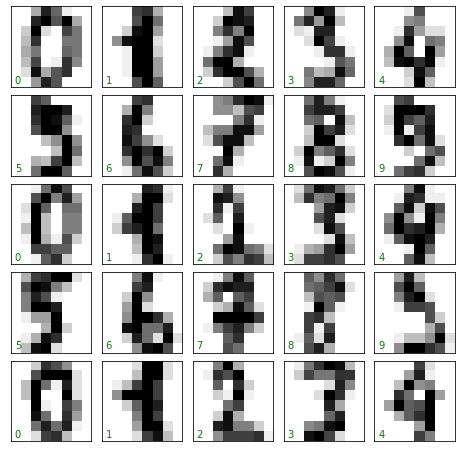

In [137]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(5, 5, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [138]:
# Read in the input and target data
X = digits.data
y = digits.target

# Split into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

### Q3.1 [5 points]
Let's start by getting a baseline performance using a simple model. Complete the below function `digits_tree_model()` which takes as inputs the training and test sets.  The function should create a decision tree model using the default settings for the hyperparameters (be sure to set `random_state=0`) and fit it on the training data.  It should then calculate the accuracy of its predictions on the test set and return the test set accuracy.

In [139]:
def digits_tree_model(X_train,X_test,y_train,y_test):
    '''
    Trains a decision tree model (use default settings) and calculates its accuracy on the test set

    Inputs:
        X_train(np.array): training set inputs (arrays of pixel values)
        X_test(np.array): test set inputs
        y_train(np.array): training set target labels
        y_test(np.array): test set target labels

    Returns:
        test_acc(float): accuracy on the test set
    '''
    # YOUR CODE HERE
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train, y_train)

    y_preds = model.predict(X_test)
    print(f'y_preds: {y_preds}')
    print(f'y_test: {y_test}')
    test_acc = np.sum(y_preds==y_test)/len(y_test)
    print('Test set accuracy is {:.3f}'.format(test_acc))

    return test_acc

    raise NotImplementedError()

In [140]:
# Test cell for digits_tree_model()
tree_acc = digits_tree_model(X_train,X_test,y_train,y_test)
print("Your tree's test set accuracy is {:.3f}".format(tree_acc))


y_preds: [2 8 2 6 6 7 1 9 8 2 2 8 6 6 6 6 4 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 5 9 6 3
 1 0 1 8 6 7 7 1 0 7 0 2 1 9 6 7 9 9 0 9 3 6 3 0 2 3 4 6 9 6 6 9 1 8 3 5 1
 2 3 2 2 9 7 2 3 6 0 9 3 7 5 1 2 2 9 3 1 7 7 1 9 5 1 5 1 2 5 9 0 7 1 4 5 2
 4 8 9 7 9 8 0 2 5 2 5 2 4 7 7 0 6 1 5 8 3 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 8 3 6 1 8 9 1 7 6 7 3 5 6 0 8 1 9 3 1 1 0 4 1 6 3 8 6 7 4 9 6 2 9
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 5 7 3 4 6 1 6 8 9 9 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 7 2 0 7 6 1 1 3 7 2 7 3 5 5 7 5 2 3 7 2 7 5 5 6
 0 9 1 6 5 3 7 4 3 8 0 3 6 4 4 3 2 6 3 8 8 4 6 7 5 2 4 5 3 2 4 6 9 0 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 6 4 2 0 7 9 8 5 7 8 2 2 4 3 7 2 6 9 1 5 1 0 8 8 1 3
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 3 0]
y_test: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 

### Q3.2 [5 points]
Now that we have a baseline for comparision, let's see if we can improve our performance using a Random Forest model.  Complete the below function `digits_rf()` which takes as inputs the training and test sets.  Your function should instantiate a Random Forest model using `min_samples_leaf=10, max_features=1, random_state=0` and the default settings for the other hyperparameters.  Fit your model on the training set and then calculate and return the accuracy of the model on the test set.

In [141]:
def digits_rf(X_train,X_test,y_train,y_test):    
    '''
    Trains a random forest tree model (use settings in instructions) and calculates its accuracy on the test set

    Inputs:
        X_train(np.array): training set inputs (arrays of pixel values)
        X_test(np.array): test set inputs
        y_train(np.array): training set target labels
        y_test(np.array): test set target labels

    Returns:
        test_acc(float): accuracy on the test set
    '''
    
    # YOUR CODE HERE
    model = RandomForestClassifier(min_samples_leaf=10, max_features=1, random_state=0)
    model.fit(X_train, y_train)

    y_preds = model.predict(X_test)
    print(f'y_preds: {y_preds}')
    print(f'y_test: {y_test}')
    test_acc = np.sum(y_preds==y_test)/len(y_test)
    print('Test set accuracy is {:.3f}'.format(test_acc))

    return test_acc


    raise NotImplementedError()

In [142]:
# Test cell for digits_tree_model()
rf_acc = digits_rf(X_train,X_test,y_train,y_test)
print("Your tree's test set accuracy is {:.3f}".format(rf_acc))


y_preds: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 7 6 9 1 8 3 5 1
 2 1 2 2 9 7 2 3 6 0 0 3 7 5 1 2 0 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 7 8 2 1 5 2 5 3 4 1 7 0 6 1 5 3 3 9 5 9 9 5 7 5 6 2 8 6 7 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 8 9 3 6 1 0 4 1 6 3 8 6 7 4 3 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 3 1 4 1 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 1 5 5 7 5 2 2 7 2 7 9 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 3 6 0 4 2 0 7 5 8 5 7 8 2 8 4 3 7 2 6 7 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 1 8]
y_test: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 

### Q3.3 [10 points]
Let's now tune our hyperparameters and see if we find a model that gives us better performance than our Random Forest model above.  Complete the function `digits_optimal_rf()` which takes the following inputs:  
- The training data X_train, y_train. 
- Minsamples_list: list of values to evaluate for hyperparameter `min_samples_leaf`. 
- Max_feats_list: list of values to evaluate for hyperparameter `max_features`. 
- Max_samples: list of values to evaluate for hyperparameter `max_samples`. 

Your function should evaluate the possible combinations of the above hyperparameters using GridSearchCV (use 3-fold cross validation and accuracy as the scoring metric).  Your function should return the best parameter combination from the above options in a dictionary (which can be accessed using the `best_params_` attribute of the GridSearchCV).

In [143]:
def digits_optimal_rf(X_train,y_train,minsamples_list,max_feats_list,max_samples_list):    
    '''
    Finds the optimal values for the hyperparameters using GridSearchCV with 3 folds and accuracy as the metric

    Inputs:
        X_train(np.array): training set inputs (arrays of pixel values)
        X_test(np.array): test set inputs
        minsamples_list (list): list of values to evaluate for hyperparameter `min_samples_leaf`. 
        max_feats_list (list): list of values to evaluate for hyperparameter `max_features`. 
        max_samples (list): list of values to evaluate for hyperparameter `max_samples`.

    Returns:
        params(dict): dictionary with the keys as the param names to optimize and values as the optimal values from the input lists
    '''
    # YOUR CODE HERE
    params = {'min_samples_leaf': minsamples_list,
          'max_features': max_feats_list,'max_samples':max_samples_list}

    model = RandomForestClassifier()
    grid_search = GridSearchCV(model,params,cv=3, scoring='accuracy')
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_

    return best_params

    raise NotImplementedError()

In [144]:
# Test cell for digits_optimal_rf()
minsamples_list = [1,3,10]
max_feats_list = [0.1,0.5,1.]
max_samples_list = [0.5,None]

bestparams = digits_optimal_rf(X_train,y_train,minsamples_list,max_feats_list,max_samples_list)
print('Your function found the following optimal parameters:')
print(bestparams)

# Instantiate new model using best parameters and evaluate
opt_model = RandomForestClassifier(**bestparams)
opt_model.fit(X_train,y_train)
test_preds = opt_model.predict(X_test)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

for i in ['min_samples_leaf','max_features','max_samples']:
    assert i in bestparams.keys()
    

Your function found the following optimal parameters:
{'max_features': 0.1, 'max_samples': None, 'min_samples_leaf': 1}
Test set accuracy is 0.969


### Q3.4 [5 points]
Let's also try an AdaBoost model on this problem to see if we can improve upon our Random Forest performance.  Complete the below function `digits_adaboost()` which takes the training and test sets as input and a model object to use as the base estimator for the AdaBoost.  Your model should train an AdaBoost model on the training data (use `random_state=0` and the input `model` for the base_estimator).  You should then calculate the accuracy of the model's predictions on the test set and return it.

In [145]:
def digits_adaboost(model,X_train,X_test,y_train,y_test):
    '''
    Trains an AdaBoost model using the provided base estimator and calculates the accuracy on the test set

    Inputs:
        model(sklearn.BaseEstimator): instantiated scikit-learn model to use as AdaBoost base estimator
        X_train(np.array): training set inputs (arrays of pixel values)
        X_test(np.array): test set inputs
        y_train(np.array): training set target labels
        y_test(np.array): test set target labels

    Returns:
        test_acc(float): accuracy on the test set
        
    '''
    # YOUR CODE HERE
    ada_model=AdaBoostClassifier(base_estimator = model, random_state=0)
    ada_model.fit(X_train, y_train)
    y_test_preds = ada_model.predict(X_test)
    test_acc = np.sum(y_test_preds==y_test)/len(y_test)
    print('Test set accuracy is {:.3f}'.format(test_acc))

    return test_acc

    raise NotImplementedError()

In [146]:
estimator = None
acc = digits_adaboost(estimator,X_train,X_test,y_train,y_test)
print('With the default base estimator of a DecisionTree of max_depth=1, the test set accuracy is: {:.3f}'.format(acc))
print()

from sklearn.linear_model import LogisticRegression
estimator2 = LogisticRegression()
acc2 = digits_adaboost(estimator2,X_train,X_test,y_train,y_test)
print('With a Logistic Regression base estimator, the test set accuracy is: {:.3f}'.format(acc2))


Test set accuracy is 0.242
With the default base estimator of a DecisionTree of max_depth=1, the test set accuracy is: 0.242

Test set accuracy is 0.933
With a Logistic Regression base estimator, the test set accuracy is: 0.933


Notice how much different the performance of AdaBoost is using the LogisticRegression algorithm as the base estimator versus the default estimator which is a single-layer decision tree.  Think for a moment about why that is...

The reason is that a one-layer decision tree can use only a single feature to split the data (since it only has one node).  For images with a large number of features, trying to classify them using only a single pixel value will likely be unsuccessful, as we see here.  On the other hand, a Logistic Regression algorithm uses all available pixels, so it does a much better job on this problem with a large number of features.

# Question 4 [20 points]
For this question we are going to use a dataset containing data on 178 Italian wines.  We have 13 numerical features describing each wine such as concentration of alcohol or malic acid.  Our objective is to see if we can organize these wines using natural patterns in their characteristics via clustering.  We will then compare our clustering groups to labels provided which indicate the origin of each wine, and see how well our clustering was able to group wines by origin.

In [147]:
# Load the data and labels and display the head
from sklearn.datasets import load_wine
winedata = load_wine()
X = pd.DataFrame(winedata.data, columns=winedata.feature_names)
y = np.array(winedata.target)

display(X.head())

# Let's scale the inputs since we have features with very different magnitudes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Q4.1 [10 points]
Now that our data is prepared we are ready to perform clustering on it.  Complete the below function `build_clusters()`.  The function takes as input the feature data X and the number of clusters to form.  Your function should perform K-Means clustering on the data and assign cluster labels to each wine in the dataset, using Euclidean distance as the distance metric).  

For this problem you CAN NOT use the K-Means algorithm from scikit-learn, you must write the clustering algorithm yourself.  I have provided some starter code which initializes the n_clusters cluster centers to random points.  Your function should return a list of the cluster assignments for each wine in the dataset.

After you have completed your clustering, run the test cell below to display your clusters on two axes using PCA.  If done properly, you should see clearly defined clusters in your data.

Note: for this question you can use any packages which are imported for you at top (scikit-learn KMeans is not imported), but you may NOT import any additional packages.

In [194]:
def build_clusters(X, n_clusters):
    '''
    Performs K-Means clustering on the data 

    Inputs:
        X(np.array): array containing the data to cluster
        n_clusters(int): desired number of clusters

    Returns:
        labels(list): list of cluster assignments for each observation
    '''
    
    # Randomly choose n_clusters initial cluster centers from among the X points
    rand_generator = np.random.RandomState(0)
    i = rand_generator.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    # YOUR CODE HERE
    
    labels = []

    def euclid_distance(point1, data):
      euc_distances =  np.sqrt(np.sum((point1 - data)**2, axis=1))
    
      #print(f'calculated euclidian distances are {euc_distance}')
      return euc_distances

    def get_assignments(point1, centerpoints):
      #distances = []
      #for point in centerpoints:
      #  distance = euclid_distance(point, point1)
      #distances.append(distance)
      distances = euclid_distance(point1, centerpoints)
      closest = np.argmin(distances)
      print(f'closest centroid to point1 is {closest}')
      return closest

    prev_centers = None

    
    while np.not_equal(centers, prev_centers).any():
      labels = []
      clusters = [[] for i in range(n_clusters)]
      #print(len(clusters))
      for x in X:
        distances = euclid_distance(x, centers)
        #print(f'distances shape is {distances.shape}')
        label = np.argmin(distances)
        clusters[label].append(x)
        #print(f'center_idx is {center_idx}')
        labels.append(label)
        #print(f' number of labels is {len(labels)}')
        

      #print(f'labels {labels}')
      prev_centers = centers
      centers = [np.mean(cluster, axis=0) for cluster in clusters]
      for i, center in enumerate(centers):
        if np.isnan(center).any():  
            centers[i] = prev_centers[i]


    return labels

    raise NotImplementedError()

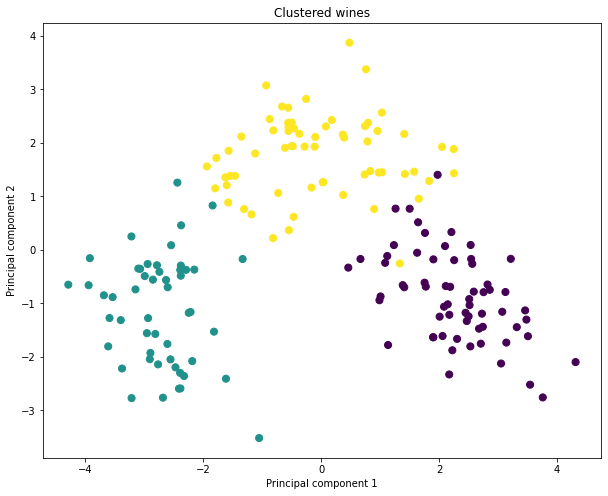

In [195]:
# Test cell for build_clusters()
cluster_labels = build_clusters(X_scaled,3)
assert len(cluster_labels) == len(X_scaled)

# Use PCA to reduce dimensions/features to 2 for visualization
pca = PCA(2)  
pca.fit(X_scaled)
# Transform data to PCA dimensions
transformed = pca.transform(X_scaled)
# Plot the transformed data on the two principal dimensions.  Color points by cluster label
fig = plt.figure(figsize=(10,8))
plt.scatter(transformed[:, 0], transformed[:, 1],c=cluster_labels, s=50)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Clustered wines')
plt.show()


### Q4.2 [5 points]
Now that we have clustered our data, let's evaluate the quality of clustering using metrics.  Complete the below function `calc_cluster_metrics()` which takes as inputs the dataset, the "ground truth" labels `y`, and the cluster labels from your clustering.  The function should calculate and return the silhouette score and the adjusted Rand Index of your clusters.

In [198]:
def calc_cluster_metrics(X,y,cluster_labels):
    '''
    Calculates the silhouette score and adjusted Rand Index for cluster assignments

    Inputs:
        X(np.array): array of data to cluster
        y(np.array): ground truth class labels
        cluster_labels(list): list of cluster assignments for each observations
    '''
    # YOUR CODE HERE

    sil = silhouette_score(X, cluster_labels, metric='euclidean')
    rand = adjusted_rand_score(y, cluster_labels)

    return sil, rand

    raise NotImplementedError()

In [199]:
sil,rand = calc_cluster_metrics(X_scaled,y,cluster_labels)
print('Silhouette score of the clustering is {:.3f}'.format(sil))
print('Adjusted Rand Index of the clustering is {:.3f}'.format(rand))


Silhouette score of the clustering is 0.284
Adjusted Rand Index of the clustering is 0.880


### Q4.3 [5 points]
Let's also try clustering our wines using Agglomerative Clustering.  Complete the below function `agglom_cluster()` which takes as inputs the dataset, the desired number of clusters and the "ground truth" labels `y`.  Your function should cluster the data using Agglomerative Clustering (use 'ward' linkage).  You should then calculate and return the Adjusted Rand Score of your clustering.

In [ ]:
def agglom_cluster(X,n_clusters,y):
    '''
    Cluster the data using Agglomerative Hierarchical Clustering and calculates the Adjusted Rand Index of the cluster assignments

    Inputs:
        X(np.array): array of data to cluster
        n_clusters(int): desired number of clusters
        y(np.array): ground truth class labels

    Returns:
        rand_scr(float): adjusted Rand Index of the cluster assignments
    '''
    
    # YOUR CODE HERE
    agg_clustering = AgglomerativeClustering.fit()
    agg_clustering

    raise NotImplementedError()

In [ ]:
rand2 = agglom_cluster(X_scaled,3,y)
print('Adjusted Rand Index of the agglomerative clustering is {:.3f}'.format(rand2))
